# Importing Libraries

In [39]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load the Titanic Dataset

In [40]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [41]:
data=sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Data Types in dataset

In [42]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

# Checking the null values

In [43]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Drop the Extra Columns

In [44]:
titnes=data.drop(['who','deck','adult_male','class','embark_town','fare','alive'],axis=1)
titnes

,survived,pclass,sex,age,sibsp,parch,embarked,alone
0,0,3,male,22.0,1,0,S,False
1,1,1,female,38.0,1,0,C,False
2,1,3,female,26.0,0,0,S,True
3,1,1,female,35.0,1,0,S,False
4,0,3,male,35.0,0,0,S,True
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,True
887,1,1,female,19.0,0,0,S,True
888,0,3,female,NaN,1,2,S,False
889,1,1,male,26.0,0,0,C,True


# Drop the Rows which contains Null Values

In [45]:
titnes.dropna(inplace=True)
titnes

,survived,pclass,sex,age,sibsp,parch,embarked,alone
0,0,3,male,22.0,1,0,S,False
1,1,1,female,38.0,1,0,C,False
2,1,3,female,26.0,0,0,S,True
3,1,1,female,35.0,1,0,S,False
4,0,3,male,35.0,0,0,S,True
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,False
886,0,2,male,27.0,0,0,S,True
887,1,1,female,19.0,0,0,S,True
889,1,1,male,26.0,0,0,C,True


# Reset index

In [46]:
titnes.reset_index(inplace=True,drop=True)
titnes

,survived,pclass,sex,age,sibsp,parch,embarked,alone
0,0,3,male,22.0,1,0,S,False
1,1,1,female,38.0,1,0,C,False
2,1,3,female,26.0,0,0,S,True
3,1,1,female,35.0,1,0,S,False
4,0,3,male,35.0,0,0,S,True
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,Q,False
708,0,2,male,27.0,0,0,S,True
709,1,1,female,19.0,0,0,S,True
710,1,1,male,26.0,0,0,C,True


# Visualize the data

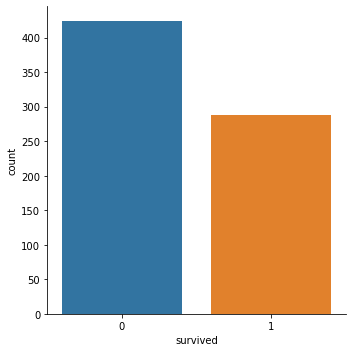

In [47]:
# Number of survived people
sns.catplot(x='survived',data=titnes,kind="count")

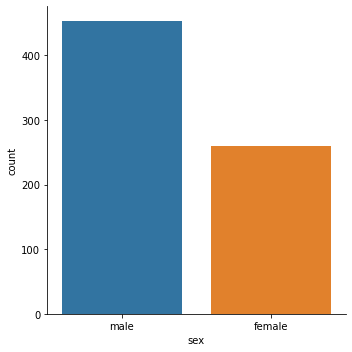

In [48]:
# Number of Male and Female 
sns.catplot(x='sex',data=titnes,kind="count")

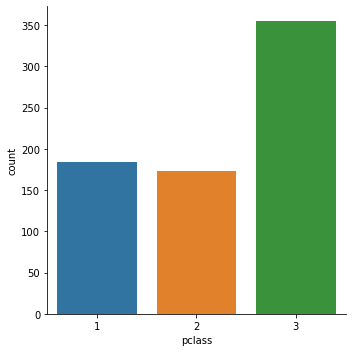

In [49]:
# Number of Pclass
sns.catplot(x='pclass',data=titnes,kind="count")

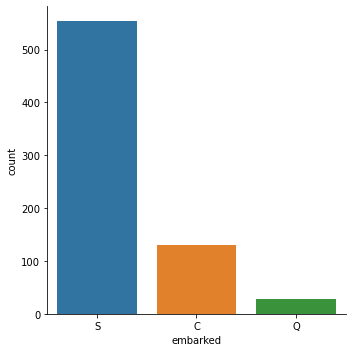

In [50]:
# Number of Embarked 
sns.catplot(x='embarked',data=titnes,kind="count")

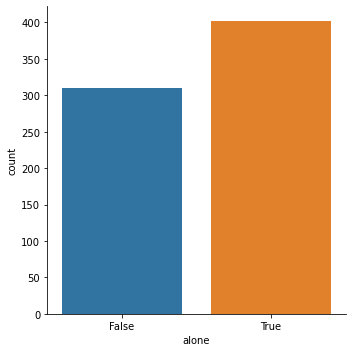

In [51]:
# Number of Alone People
sns.catplot(x='alone',data=titnes,kind="count")

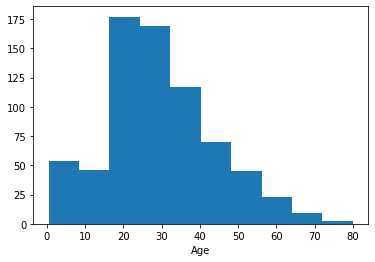

In [52]:
# Graph of Age Group
plt.hist(titnes['age'])
plt.xlabel('Age')
plt.show()

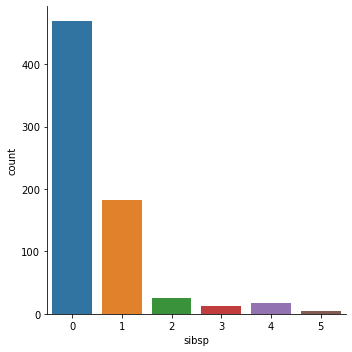

In [53]:
# Number of Siblings
sns.catplot(x='sibsp',data=titnes,kind="count")

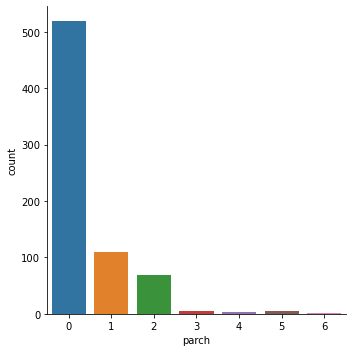

In [54]:
# Number of Parents
sns.catplot(x='parch',data=titnes,kind="count")


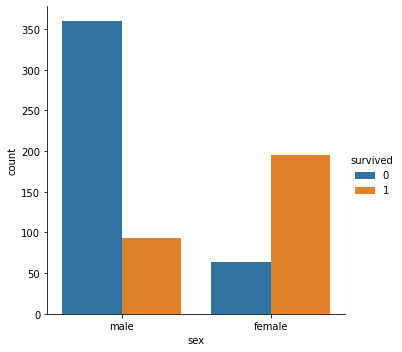

In [55]:
# Gender who survived more
sns.catplot(x='sex',data=titnes,kind="count",hue='survived')

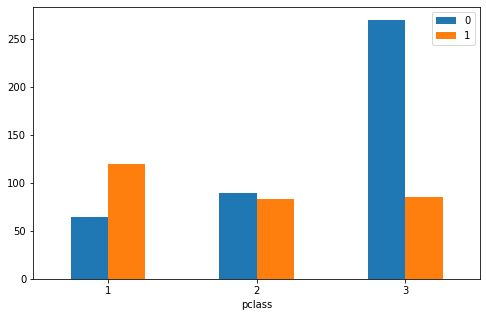

In [56]:
# People of which class survived more
pd.crosstab(titnes.pclass,titnes.survived).plot.bar(figsize=(8,5))
plt.xticks(rotation=0)
plt.legend()

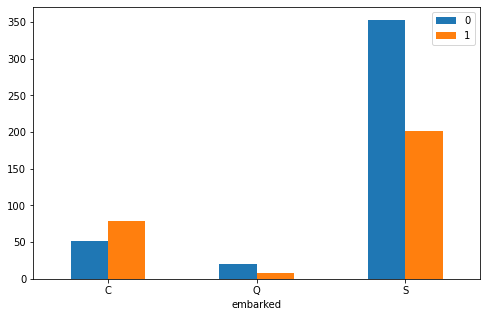

In [57]:
# People of which embarked class survived more
pd.crosstab(titnes.embarked,titnes.survived).plot.bar(figsize=(8,5))
plt.xticks(rotation=0)
plt.legend()

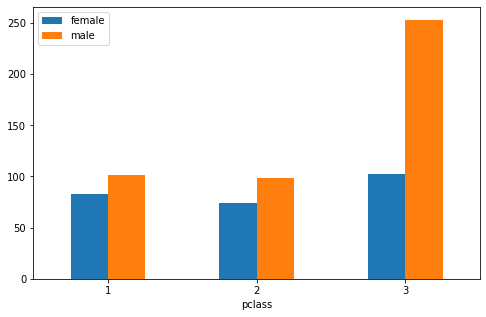

In [58]:
# class contains male and female
pd.crosstab(titnes.pclass,titnes.sex).plot.bar(figsize=(8,5))
plt.xticks(rotation=0)
plt.legend()

# Encodes sex and embarked

In [59]:
xlb=titnes.apply(LabelEncoder().fit_transform)
xlb

,survived,pclass,sex,age,sibsp,parch,embarked,alone
0,0,2,1,28,1,0,2,0
1,1,0,0,51,1,0,0,0
2,1,2,0,34,0,0,2,1
3,1,0,0,47,1,0,2,0
4,0,2,1,47,0,0,2,1
...,...,...,...,...,...,...,...,...
707,0,2,0,52,0,5,1,0
708,0,1,1,35,0,0,2,1
709,1,0,0,24,0,0,2,1
710,1,0,1,34,0,0,0,1


# separate the independent variable from data

In [60]:
x=xlb.drop(['survived'],axis=1)
x

,pclass,sex,age,sibsp,parch,embarked,alone
0,2,1,28,1,0,2,0
1,0,0,51,1,0,0,0
2,2,0,34,0,0,2,1
3,0,0,47,1,0,2,0
4,2,1,47,0,0,2,1
...,...,...,...,...,...,...,...
707,2,0,52,0,5,1,0
708,1,1,35,0,0,2,1
709,0,0,24,0,0,2,1
710,0,1,34,0,0,0,1


# separate the dependent variable from data

In [61]:
y=xlb.survived
y

0      0
1      1
2      1
3      1
4      0
      ..
707    0
708    0
709    1
710    1
711    0
Name: survived, Length: 712, dtype: int64

# Distribute the training and testing data

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=1)

# Logistic Regression

In [63]:
lr=LogisticRegression(solver='newton-cg')

In [64]:
lr.fit(xtrain,ytrain)

LogisticRegression(solver='newton-cg')

In [65]:
ped1=lr.predict(xtest)
ped1

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1], dtype=int64)

### Confusion Matrix for Logistic Regression

In [66]:
confusion_matrix(ytest,ped1)

array([[33,  7],
       [10, 22]], dtype=int64)

### Accuracy Score for Logistic Regression

In [67]:
z=accuracy_score(ytest,ped1)
z

0.7638888888888888

 # Decision Tree        

In [68]:
dtree=DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [69]:
ped2=dtree.predict(xtest)
ped2

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1], dtype=int64)

### Confusion Matrix for Decision Tree

In [70]:
confusion_matrix(ytest,ped2)

array([[36,  4],
       [12, 20]], dtype=int64)

### Accuracy Score for Decision Tree

In [71]:
z=accuracy_score(ytest,ped2)
z

0.7777777777777778

# Random Forest

In [72]:
clf=RandomForestClassifier(n_estimators=400)

In [73]:
clf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=400)

In [74]:
ped3=clf.predict(xtest)
ped3

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1], dtype=int64)

### Confusion Matrix for Random Forest

In [75]:
confusion_matrix(ytest,ped3)

array([[30, 10],
       [ 9, 23]], dtype=int64)

### Accuracy Score for Random Forest

In [76]:
z=accuracy_score(ytest,ped3)
z

0.7361111111111112

# Result

 ### In this model we saw that the Decision tree  have more accuracy than Logistic Regression and Random Forest